# Homework 4: Visualizing Monetary Policy

# 1. Download and plot 3 apparently related sets of data with at least. Each set should contain at least two related variables. You should explain how variables in each set of data are related. Plot each set using the scatter plot function and the line graph function. For example, you might the obseved rate of unemployement and the natural rate of unemployment in the same graph. To find data, search for data at FRED and use the code associated with the data. For example, the CPI measure that includes urban items is identified by the code, CPIAUCSL.

In [41]:
import os
import pandas as pd
import pandas_datareader.data as web
import datetime
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import *

start = datetime.datetime(1980, 1,1)
end = datetime.datetime.today()

def gather_data(data_codes,
               start,
               end = datetime.datetime.today(),
               freq = "M"):
    df_init = False
    for key, code in data_codes.items():
        if df_init == False:
            df = web.DataReader(
                code, "fred", start, end).resample(freq).mean()
            df.rename(columns = {code:key}, inplace = True)
            df_init = True
        else:
            df[key] = web.DataReader(
                code, "fred", start, end).resample(freq).mean()
            
    return df
            

In [42]:
data_codes  = {"Unemployment Rate": "UNRATE",
               "Unemployment Rate - Women": "LNS14000002",
              "Unemployment Rate - Men": "LNS14000001",
              "Unemployment Rate - White": "LNS14000003",
              "Unemployment Rate - Hispanic or Latino": "LNS14000009"
              }
start = datetime.datetime(1980, 1, 1)
end = datetime.datetime.today()
data = gather_data(data_codes = data_codes,
                  start = start,
                  end = end,
                  freq = "M")

In [43]:
def plot_lines(df,
              linewidth = 5,
              figsize = (40,20),
              secondary_y = None,
              legend = True,
              pp = None,
              save_fig = False,
               global_fontsize = 50):
    plt.rcParams.update({"font.size":global_fontsize})
    fig, ax = plt.subplots(figsize = figsize)
    df.dropna(axis = 0, how = "all").plot.line(
        linewidth = linewidth,
        ax = ax,
        secondary_y = secondary_y,
        legend = legend)
    ax.set_xlabel("")
    ax.tick_params(axis = "x", rotation = 90)
    ax.tick_params(length= 0, which= 'both')
    y_vals = ax.get_yticks()
    ax.set_yticklabels([round(y,2) for y in y_vals])

### Unemployment rate - women compared to Unemployment rate - men:

The unemployment rate of men is related to the unemployment rate of women because they are both looking at the unemployment rate. The unemployment rate of men is looking specifically at men's rate, while the unemployment rate of women is looking specifally at the women's rate. I thought it would be interesting to see how the unemployment rate compared between genders.

/var/folders/3j/6nrfh83n4n5dgx0fgb3pdh9c0000gn/T/ipykernel_13796/3566090915.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([round(y,2) for y in y_vals])


Text(0, 0.5, 'Unemployment Rate')

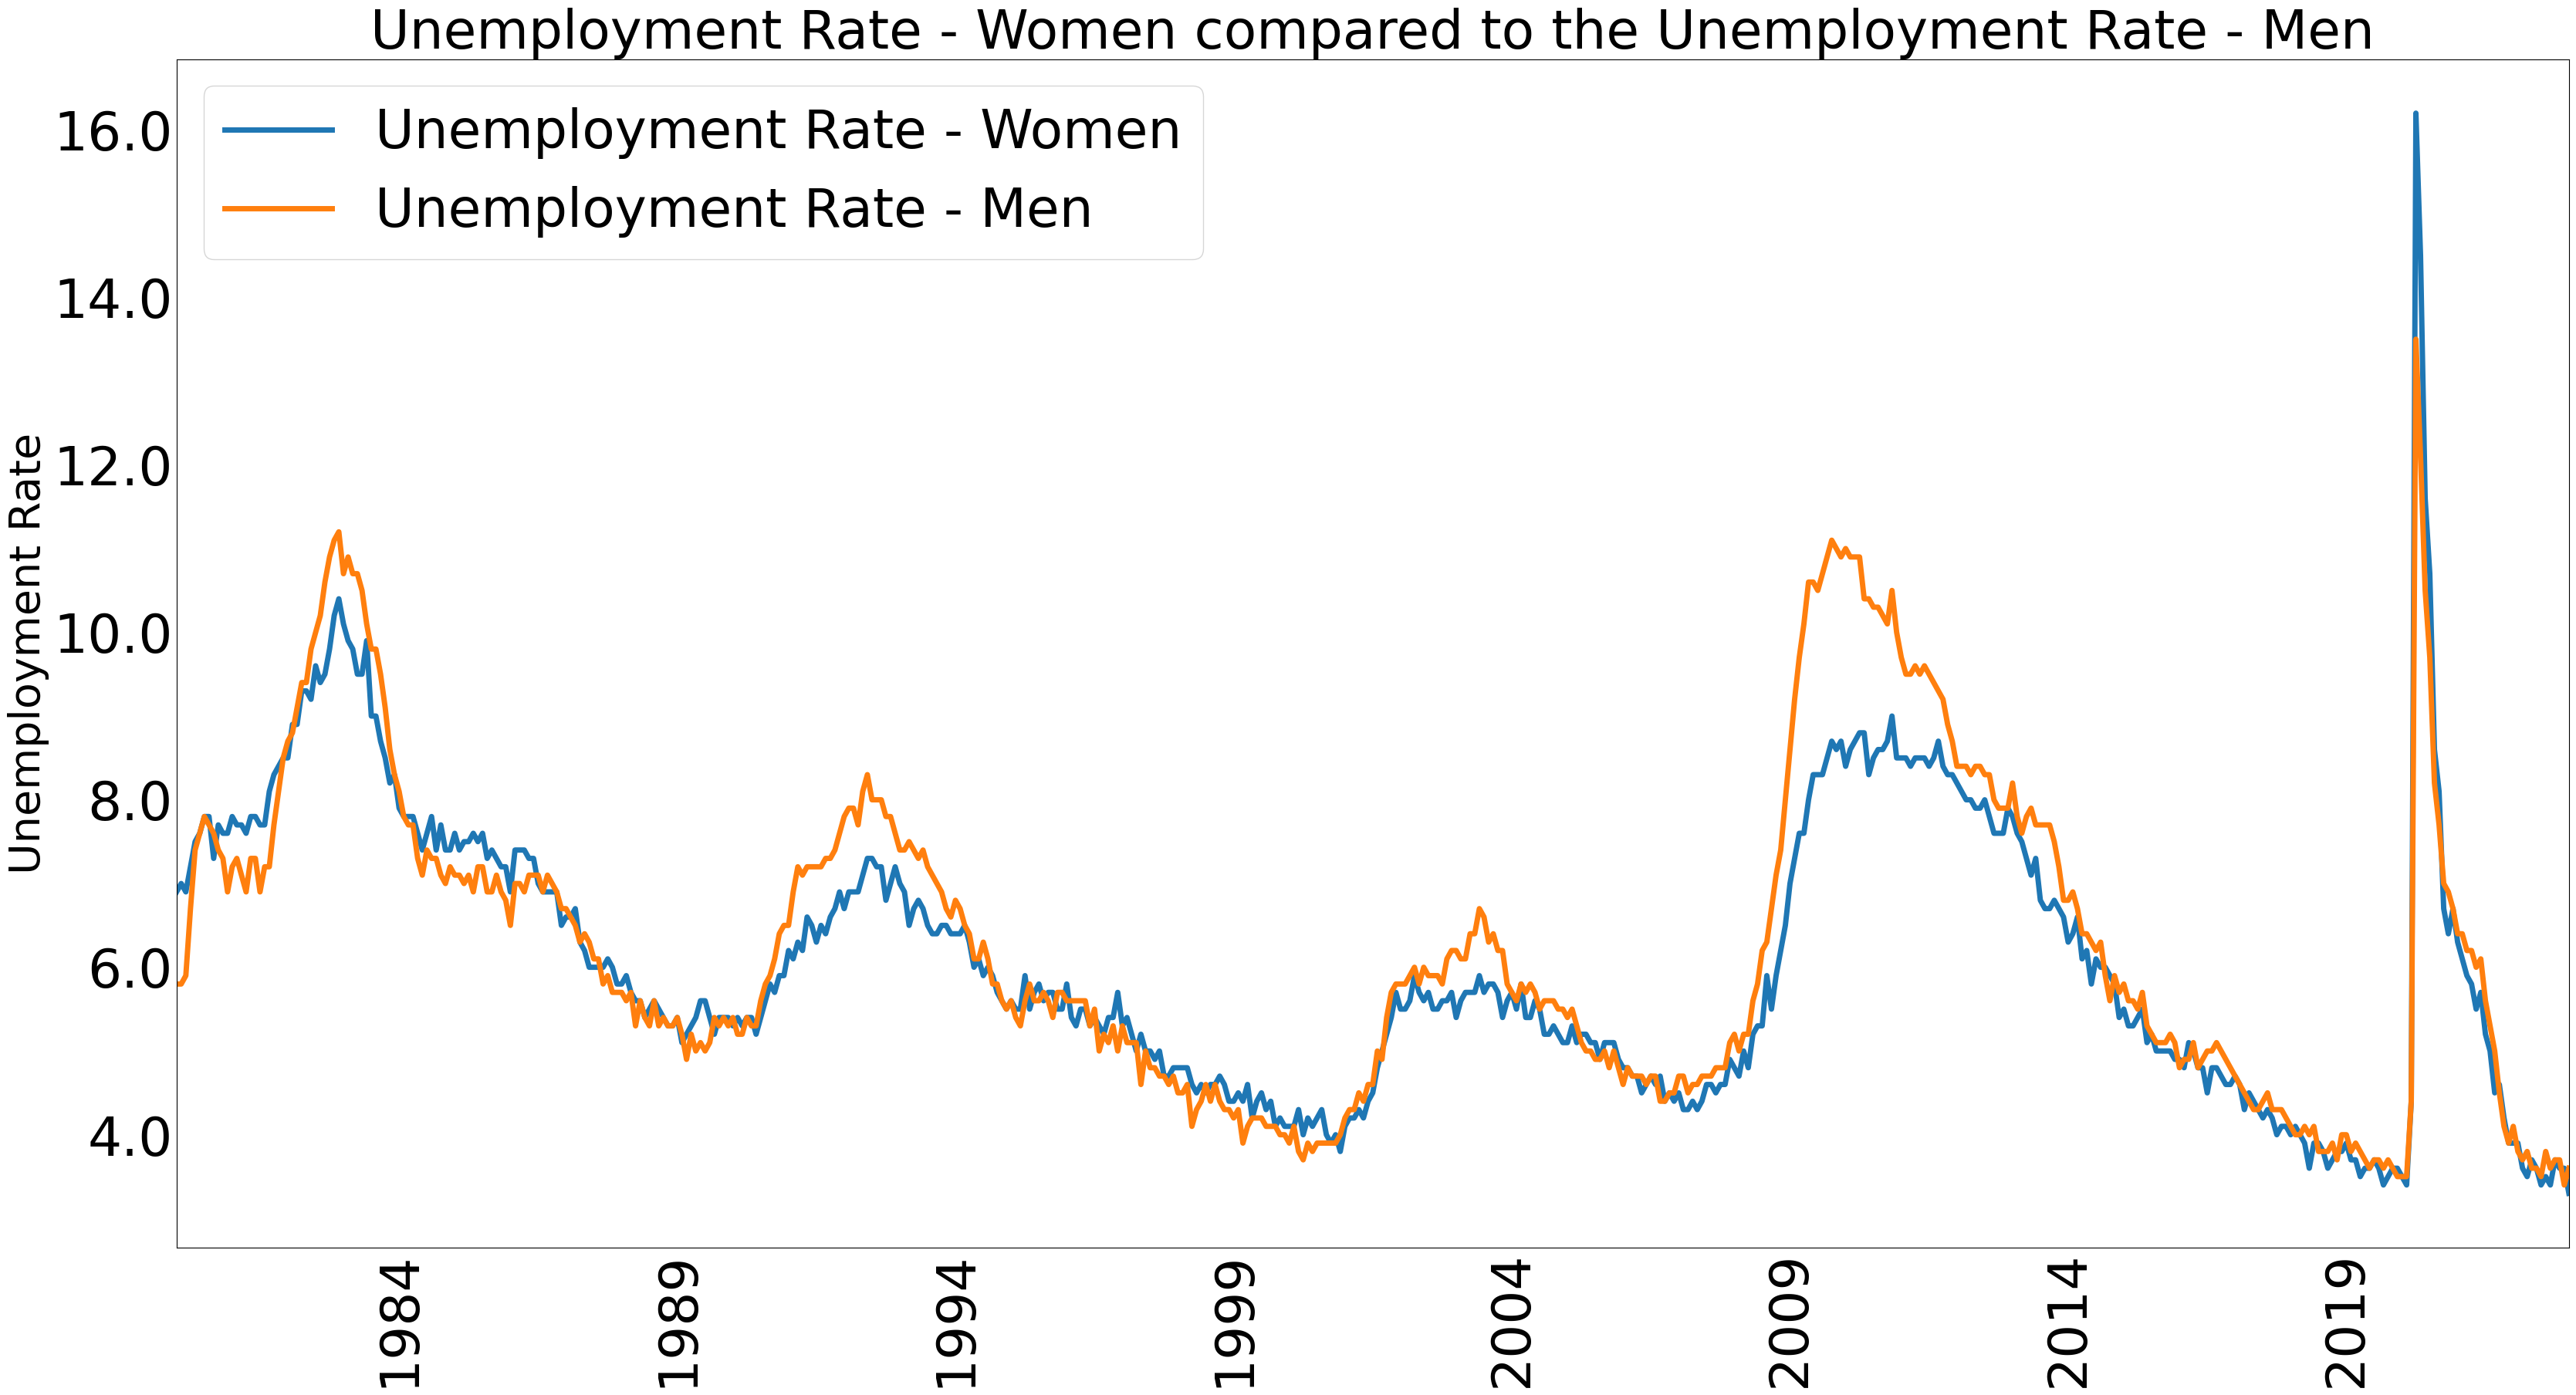

In [44]:
plt.rcParams.update({"font.size":32})
gender_vars = ["Unemployment Rate - Women",
              "Unemployment Rate - Men"]
plot_lines(df = data[gender_vars], linewidth = 5, figsize = (40, 20), pp = None)
plt.title("Unemployment Rate - Women compared to the Unemployment Rate - Men", fontsize = 50)
plt.ylabel("Unemployment Rate", fontsize = 40)

Text(0.5, 1.0, 'Unemployment Rate - Women compared to the Unemployment Rate - Men')

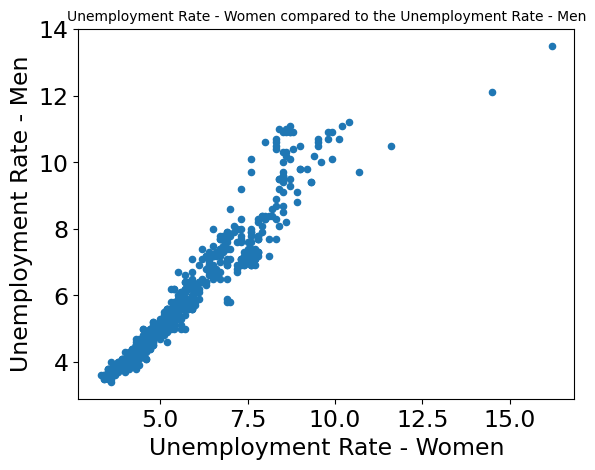

In [45]:
plt.rcParams.update({"font.size":17})
df = data
ax = df.plot.scatter(x = "Unemployment Rate - Women", y = "Unemployment Rate - Men", colormap= "viridis")
plt.title("Unemployment Rate - Women compared to the Unemployment Rate - Men", fontsize = 10)

### Unemployment rate - White compared to unemployment rate - Hispanic or Latino:

The unemployment rate of white people is related to the unemployment rate of Hispanics or Latinos because they are both looking at the unemployment rate. The unemployment rate - white is looking specifically at white people's rate, while the unemployment rate - Hispanic or Latino is looking specifally at Hispanic or Latino peoples's rate. I thought it would be interesting to see how the unemployment rate compared between the two.

/var/folders/3j/6nrfh83n4n5dgx0fgb3pdh9c0000gn/T/ipykernel_13796/3566090915.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([round(y,2) for y in y_vals])


Text(0, 0.5, 'Unemployment Rate')

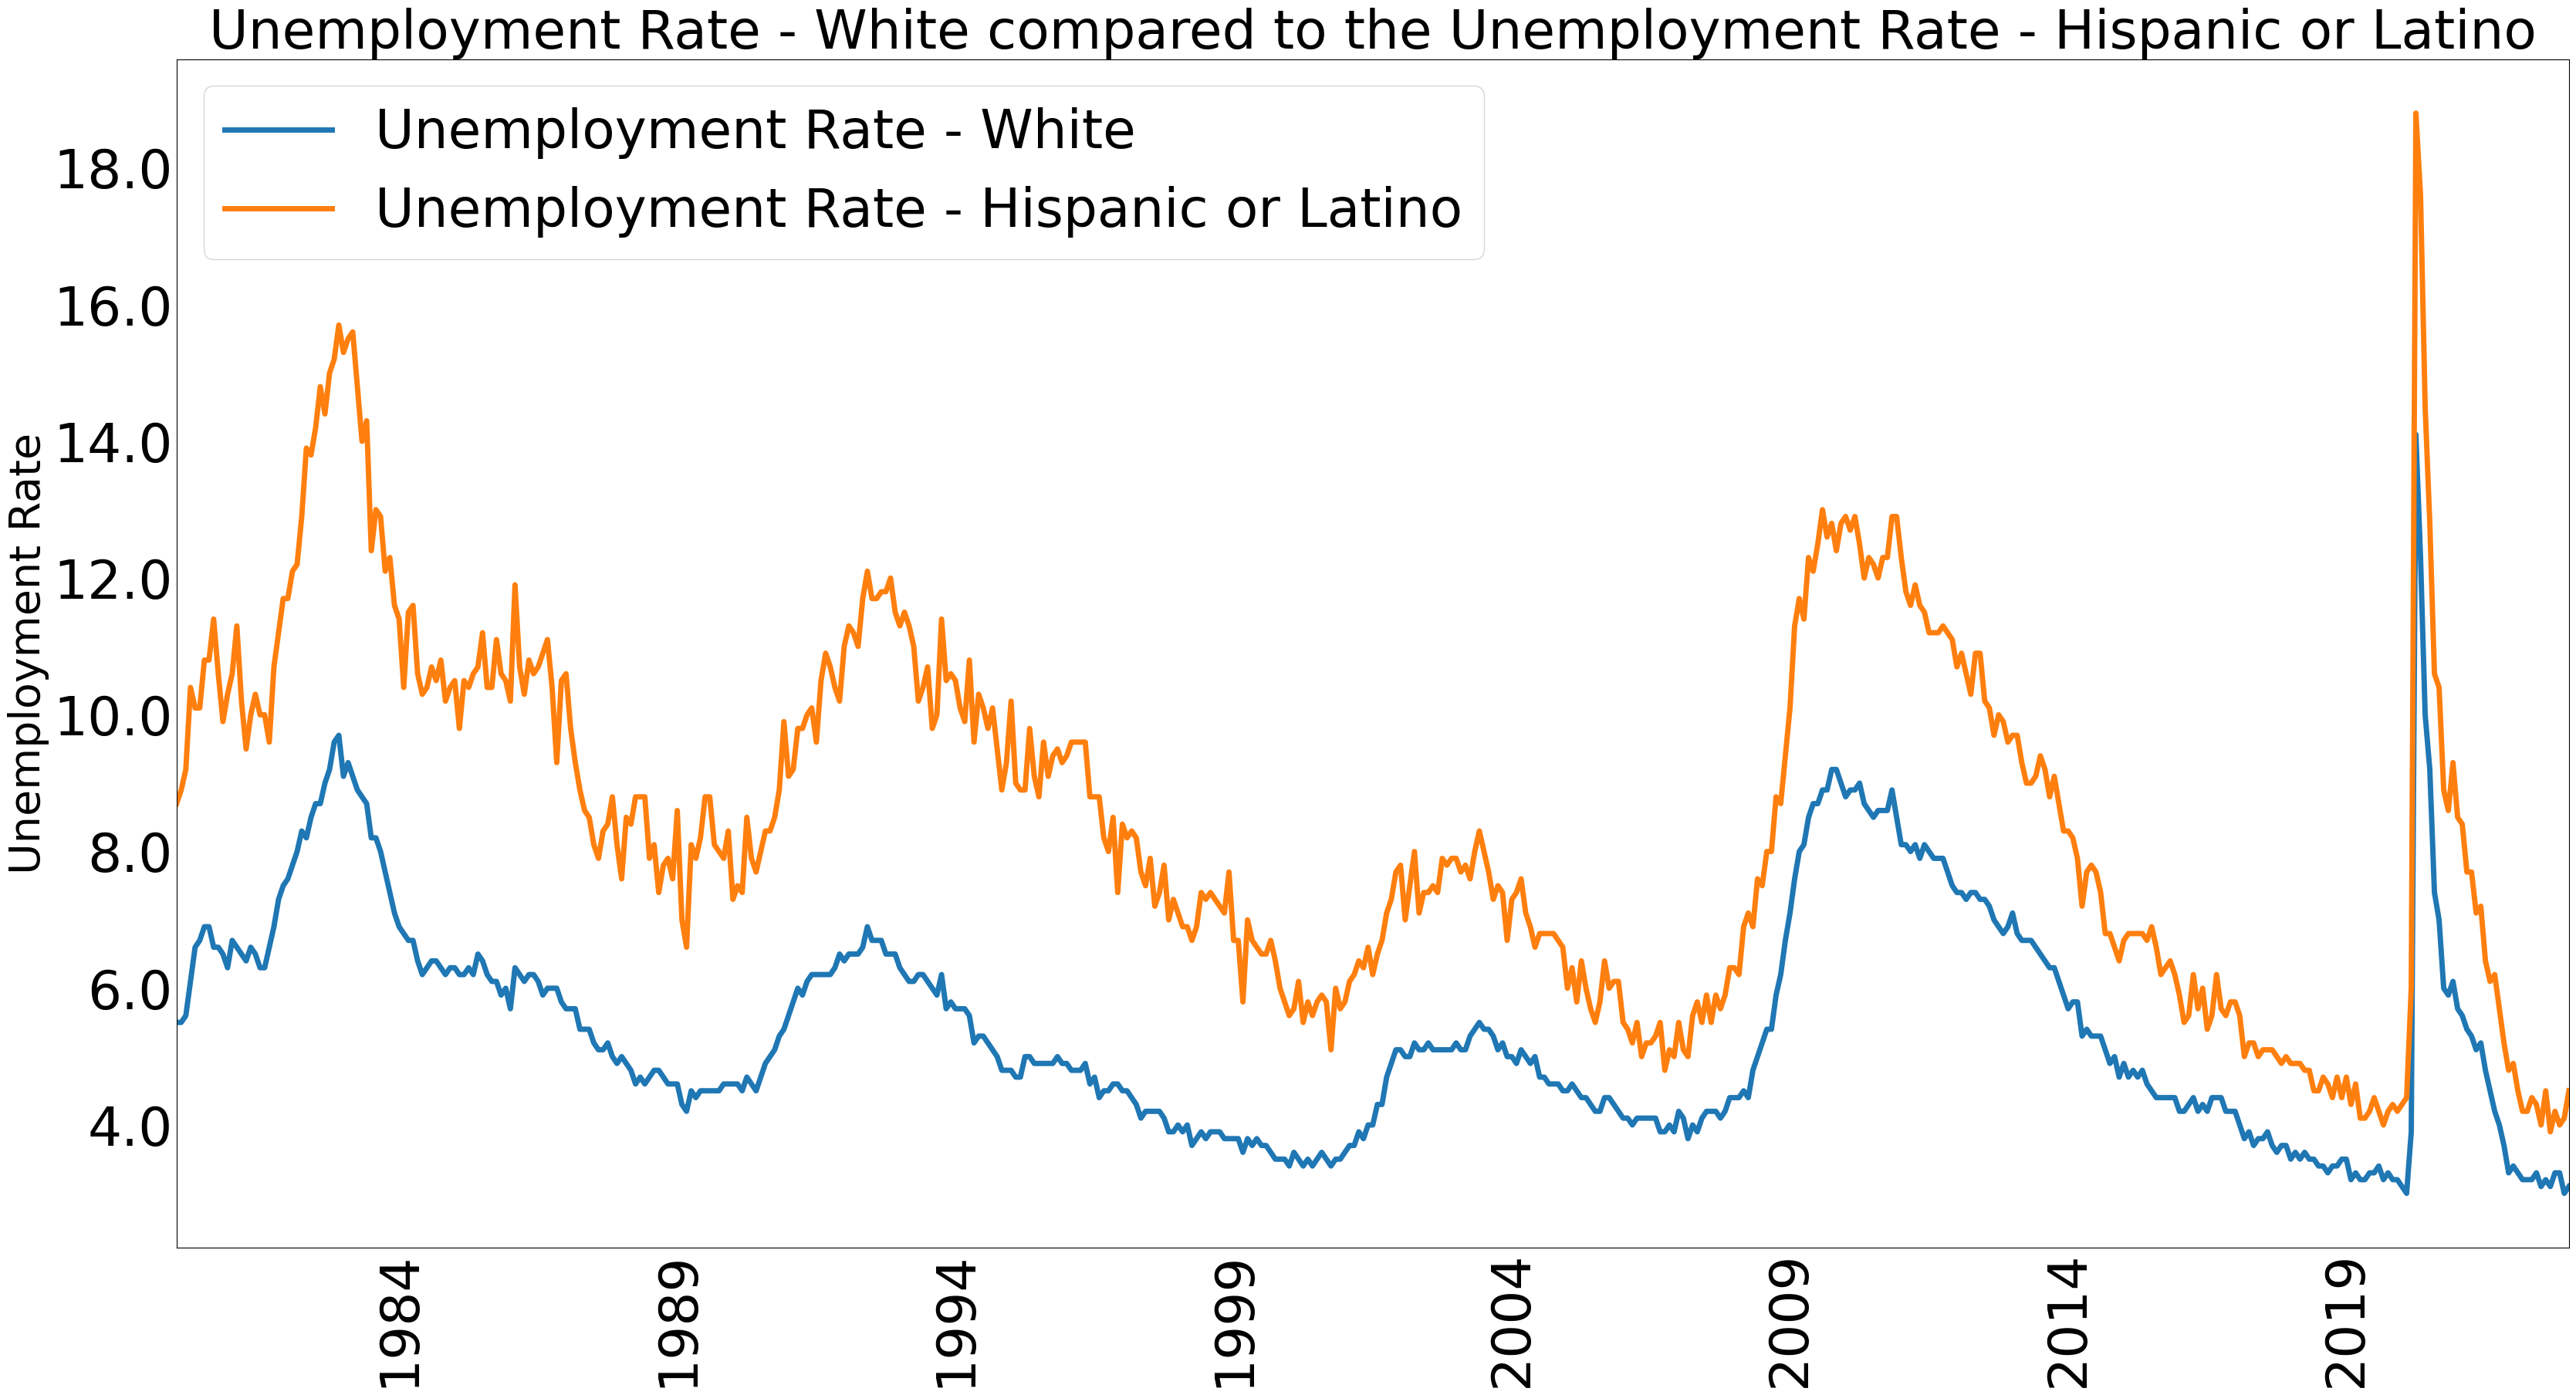

In [46]:
plt.rcParams.update({"font.size":32})
race_vars = ["Unemployment Rate - White",
              "Unemployment Rate - Hispanic or Latino"]
plot_lines(df = data[race_vars], linewidth = 5, figsize = (40, 20), pp = None)
plt.title("Unemployment Rate - White compared to the Unemployment Rate - Hispanic or Latino", fontsize = 50)
plt.ylabel("Unemployment Rate", fontsize = 40)

Text(0.5, 1.0, 'Unemployment Rate - White compared to the Unemployment Rate - Hispanic or Latino')

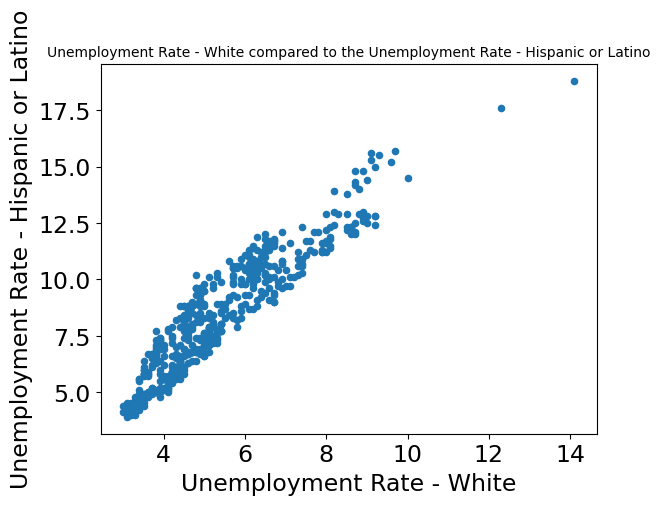

In [47]:
plt.rcParams.update({"font.size":17})
df = data
ax = df.plot.scatter(x = "Unemployment Rate - White", y = "Unemployment Rate - Hispanic or Latino", colormap= "viridis")
plt.title("Unemployment Rate - White compared to the Unemployment Rate - Hispanic or Latino", fontsize = 10)

### Unemployment rate compared to Unemployment rate - women:

The unemployment rate is related to the unemployment rate of women because they are both looking at the unemployment rate. The unemployment rate is looking at the overall unemployment rate, while the unemployment rate - women is looking specifally at women's rate. I thought it would be interesting to see how the overall unemployment rate compared with women's unemployment rate.

/var/folders/3j/6nrfh83n4n5dgx0fgb3pdh9c0000gn/T/ipykernel_13796/3566090915.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([round(y,2) for y in y_vals])


Text(0, 0.5, 'Unemployment Rate')

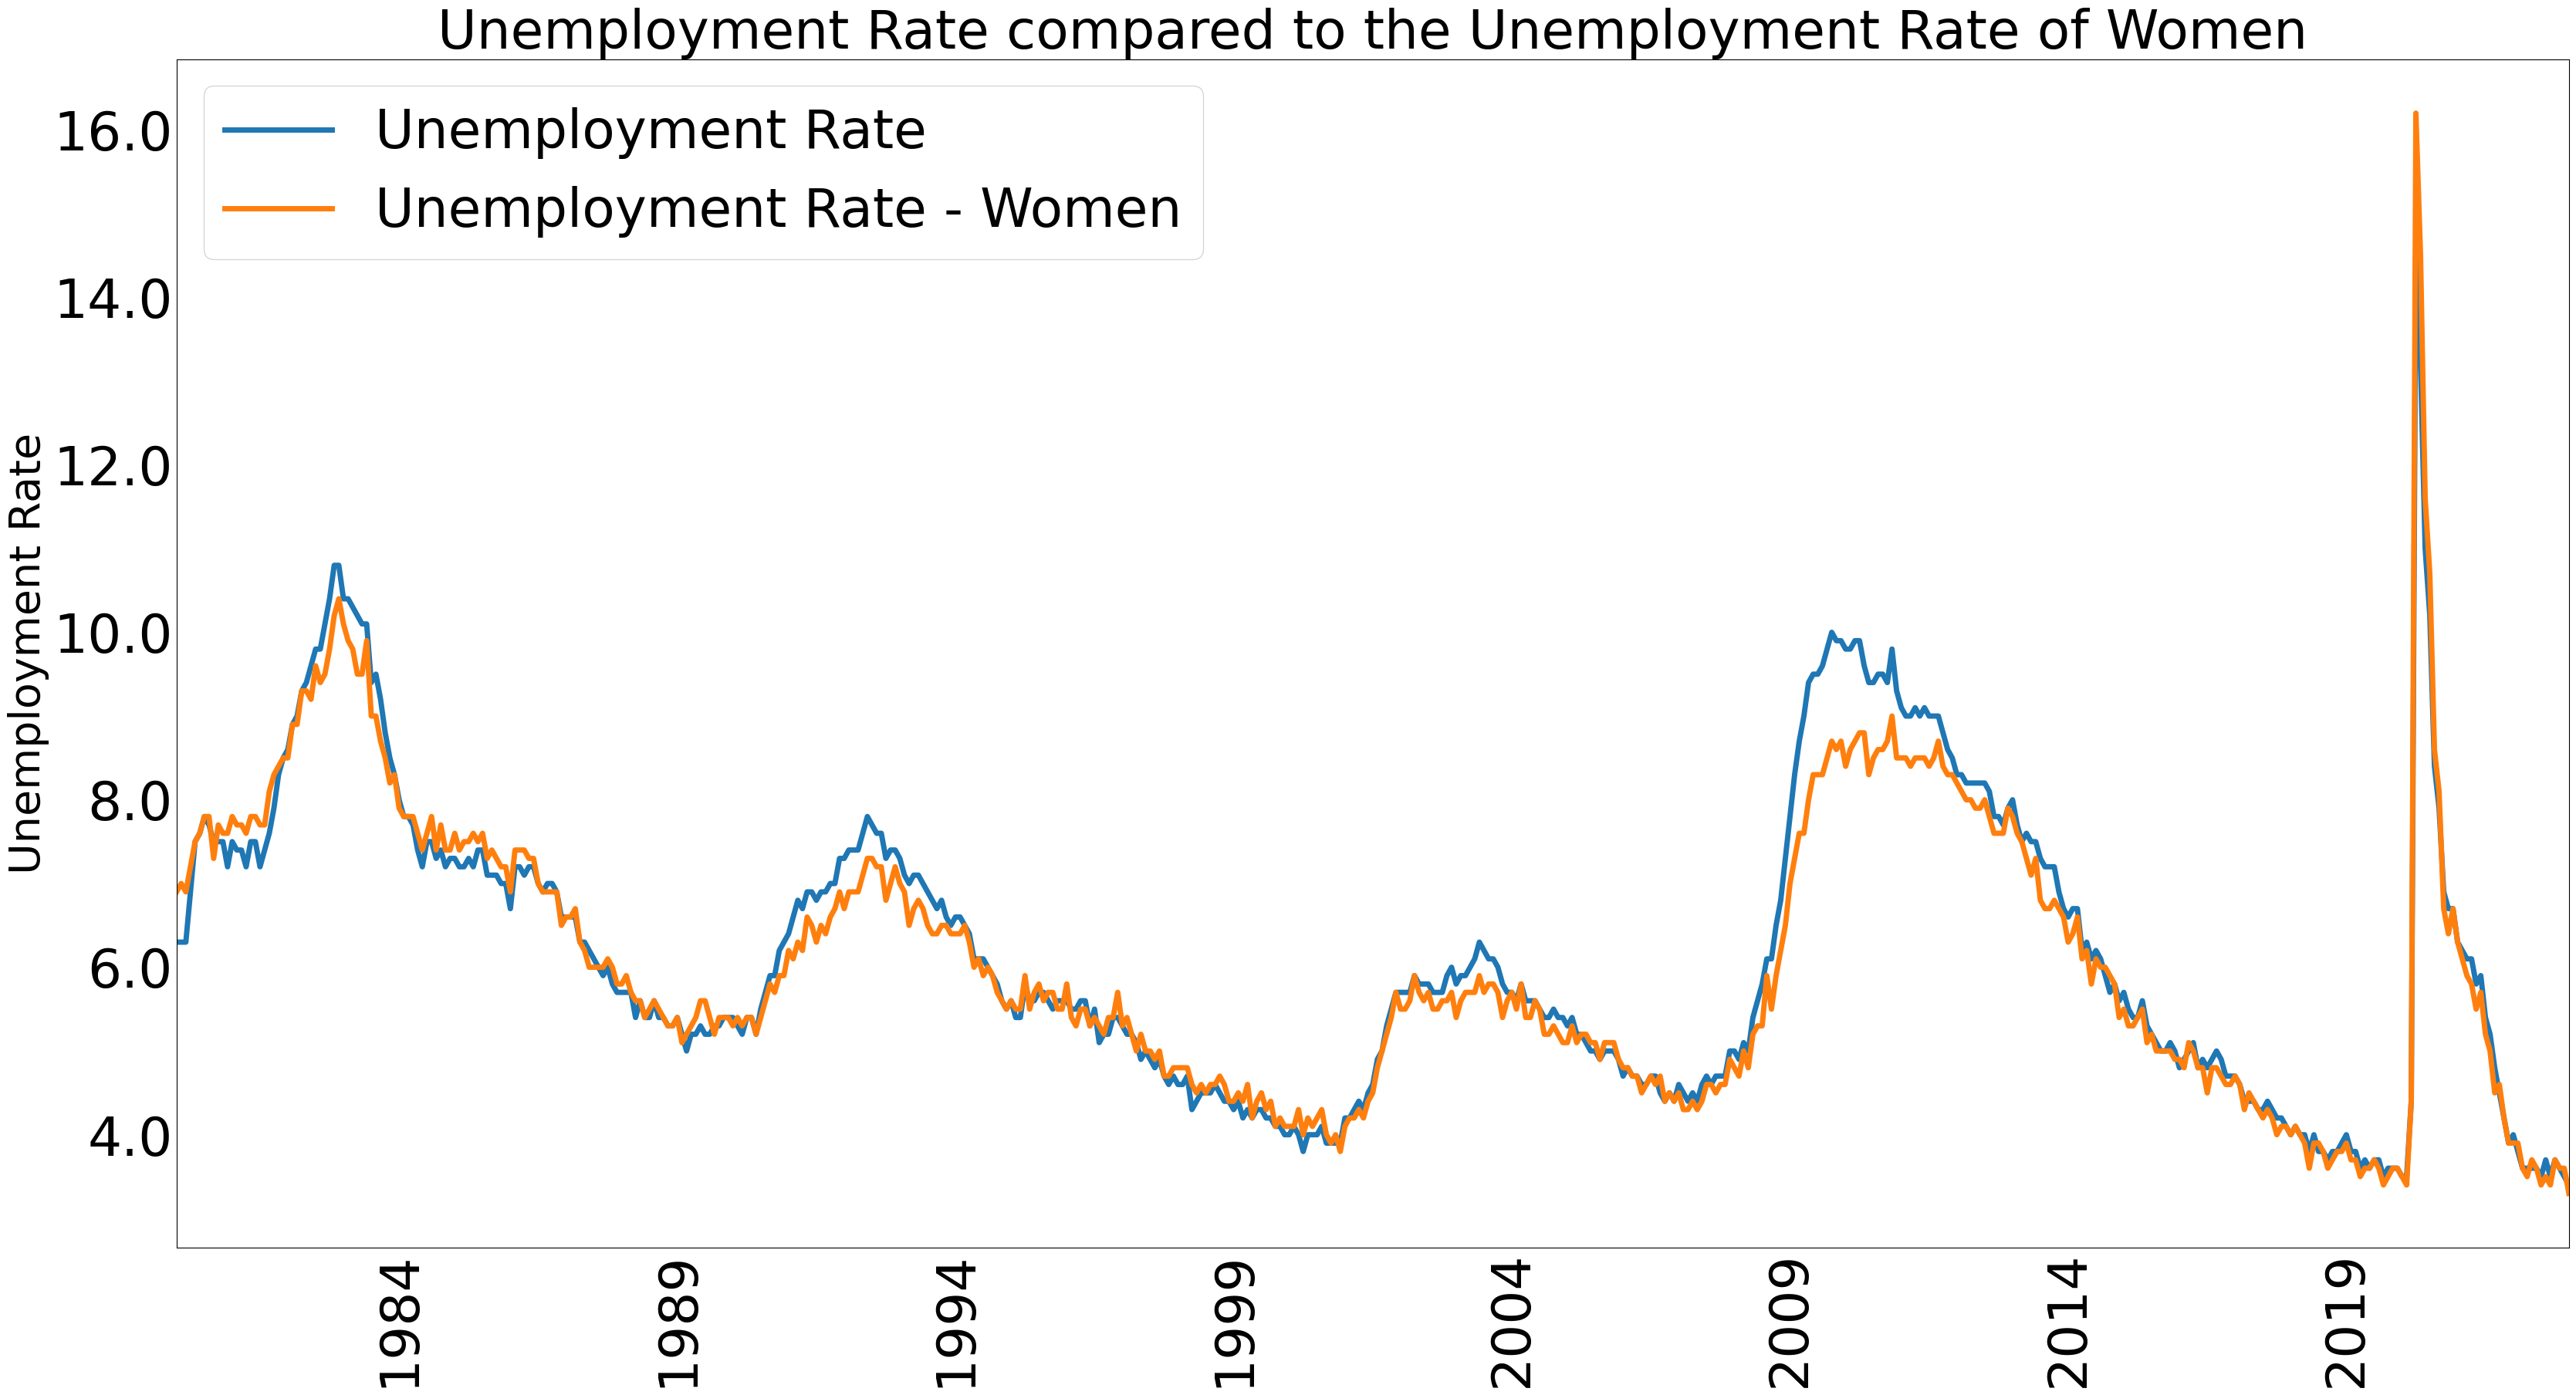

In [48]:
plt.rcParams.update({"font.size":32}) 
compare_vars = ["Unemployment Rate",
               "Unemployment Rate - Women"]
plot_lines(df = data[compare_vars], linewidth = 5, figsize = (40, 20))
plt.title("Unemployment Rate compared to the Unemployment Rate of Women", fontsize = 50)
plt.ylabel("Unemployment Rate", fontsize = 40)

Text(0.5, 1.0, 'Unemployment Rate compared to the Unemployment Rate of Women')

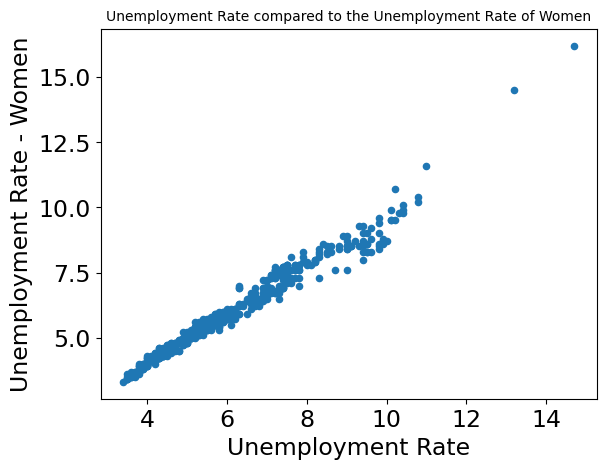

In [49]:
plt.rcParams.update({"font.size":17})
df = data
ax = df.plot.scatter(x = "Unemployment Rate", y = "Unemployment Rate - Women", colormap= "viridis")
plt.title("Unemployment Rate compared to the Unemployment Rate of Women", fontsize = 10)

### The unemployment rate compared to men's and women's unemployment rate:

The unemployment rate is related to the unemployment rate of women and men because they are all looking at the unemployment rate. The unemployment rate is looking at the overall unemployment rate, while the unemployment rate - women and unemployment rate - men are looking specifally at women's and men's rates. I thought it would be interesting to see how the overall unemployment rate compared with each gender's unemployment rate.

/var/folders/3j/6nrfh83n4n5dgx0fgb3pdh9c0000gn/T/ipykernel_13796/3566090915.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([round(y,2) for y in y_vals])


Text(0, 0.5, 'Unemployment Rate')

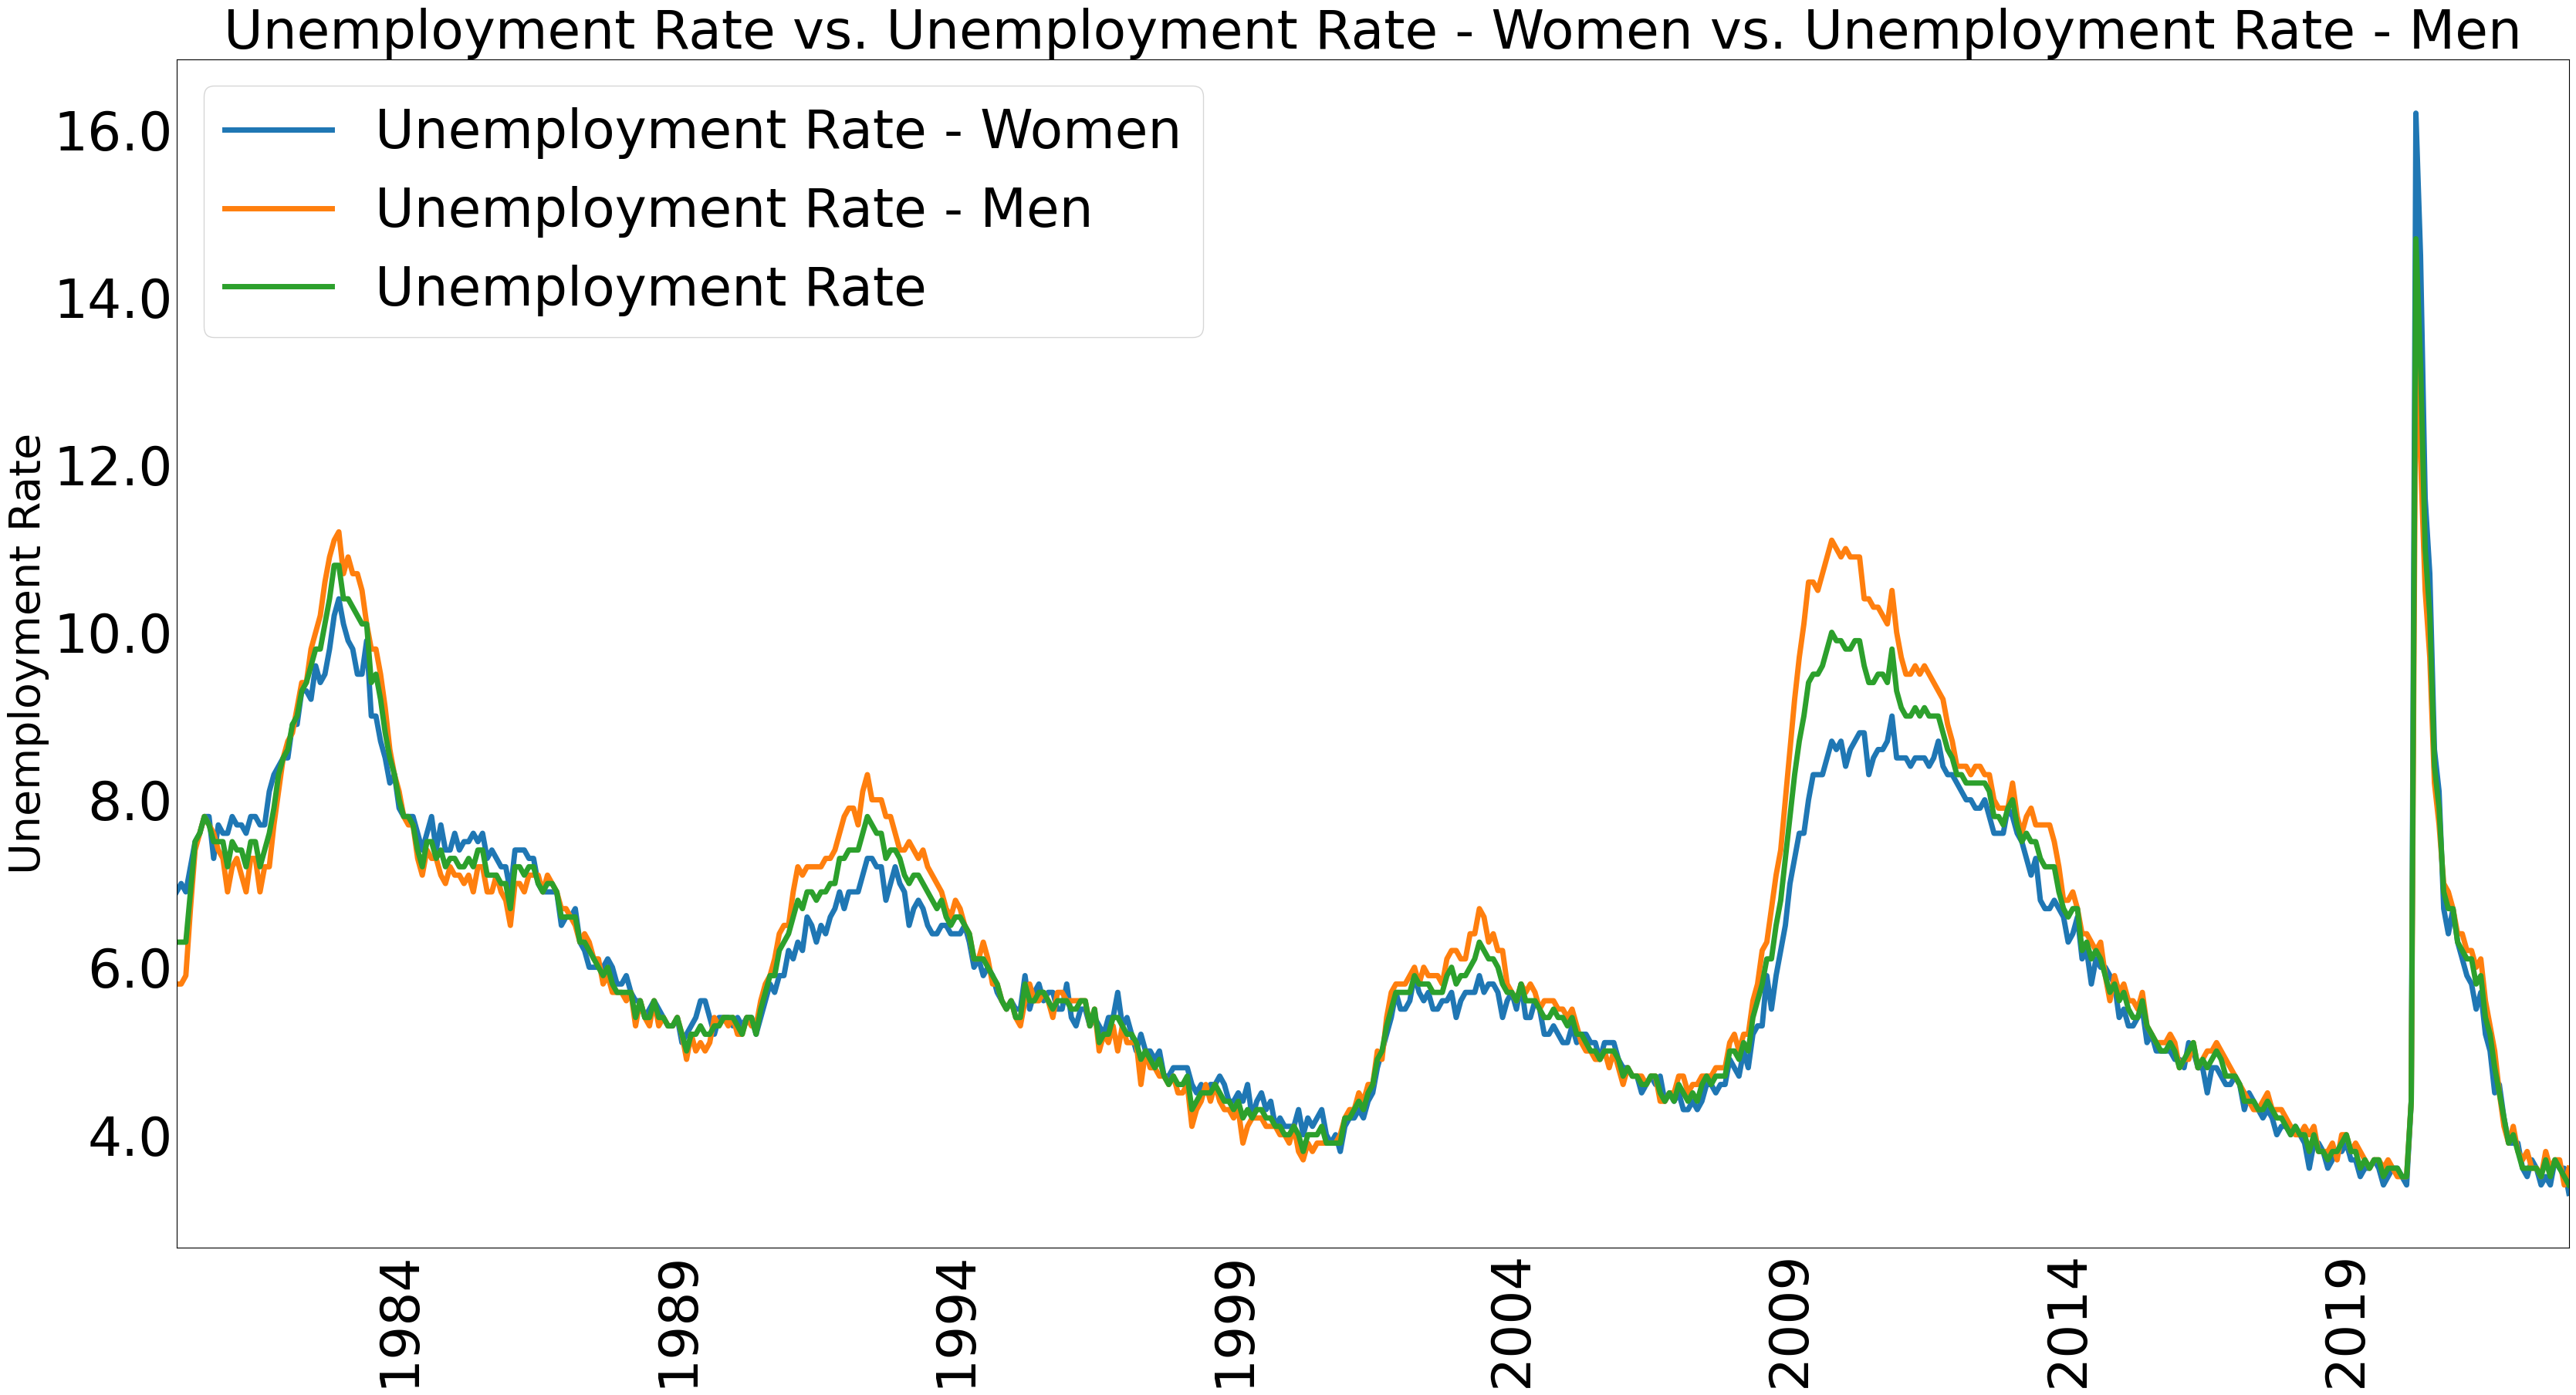

In [50]:
plt.rcParams.update({"font.size":32})
gender_vars = ["Unemployment Rate - Women",
              "Unemployment Rate - Men",
              "Unemployment Rate"]
plot_lines(df = data[gender_vars], linewidth = 5, figsize = (40, 20), pp = None)
plt.title("Unemployment Rate vs. Unemployment Rate - Women vs. Unemployment Rate - Men", fontsize = 50)
plt.ylabel("Unemployment Rate", fontsize = 40)

Text(0.5, 1.0, 'Unemployment Rate compared to the Unemployment Rate of Men')

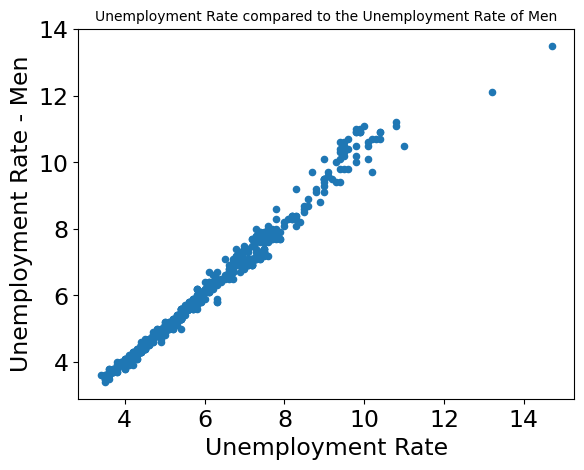

In [51]:
plt.rcParams.update({"font.size":17})
df = data
ax = df.plot.scatter(x = "Unemployment Rate", y = "Unemployment Rate - Men", colormap= "viridis")
plt.title("Unemployment Rate compared to the Unemployment Rate of Men", fontsize = 10)

# 2. Create a correlation matrix for quarterly observations of Nominal GDP, Real GDP, the Price Level (CPI or GDP Deflator), the quantity of currency in circulation and the federal funds rate for as large of a date range as possible. Then, calculate the year-over-year percent change for each each variable and save the results as variables in the same dataframe. Create a correlation matrix for these new variables.

In [68]:
def gather_data1(newdata_codes,
               start,
               end = datetime.datetime.today(),
               freq = "Q"):
    df_init = False
    for key, code in newdata_codes.items():
        if df_init == False:
            df = web.DataReader(
                code, "fred", start, end).resample(freq).mean()
            df.rename(columns = {code:key}, inplace = True)
            df_init = True
        else:
            df[key] = web.DataReader(
                code, "fred", start, end).resample(freq).mean()
            
    return df


In [69]:
newdata_codes  = {"Gross Domestic Product": "GDP",
               "Real Gross Domestic Product": "GDPC1",
              "Gross Domestic Product: Implicit Price Deflator": "GDPDEF",
              "Currency in Circulation": "CURRCIR",
              "Federal Funds Effective Rate": "DFF"
              }
start = datetime.datetime(1955, 1, 1)
end = datetime.datetime.today()
data1 = gather_data1(newdata_codes = newdata_codes,
                  start = start,
                  end = end,
                  freq = "Q")

       

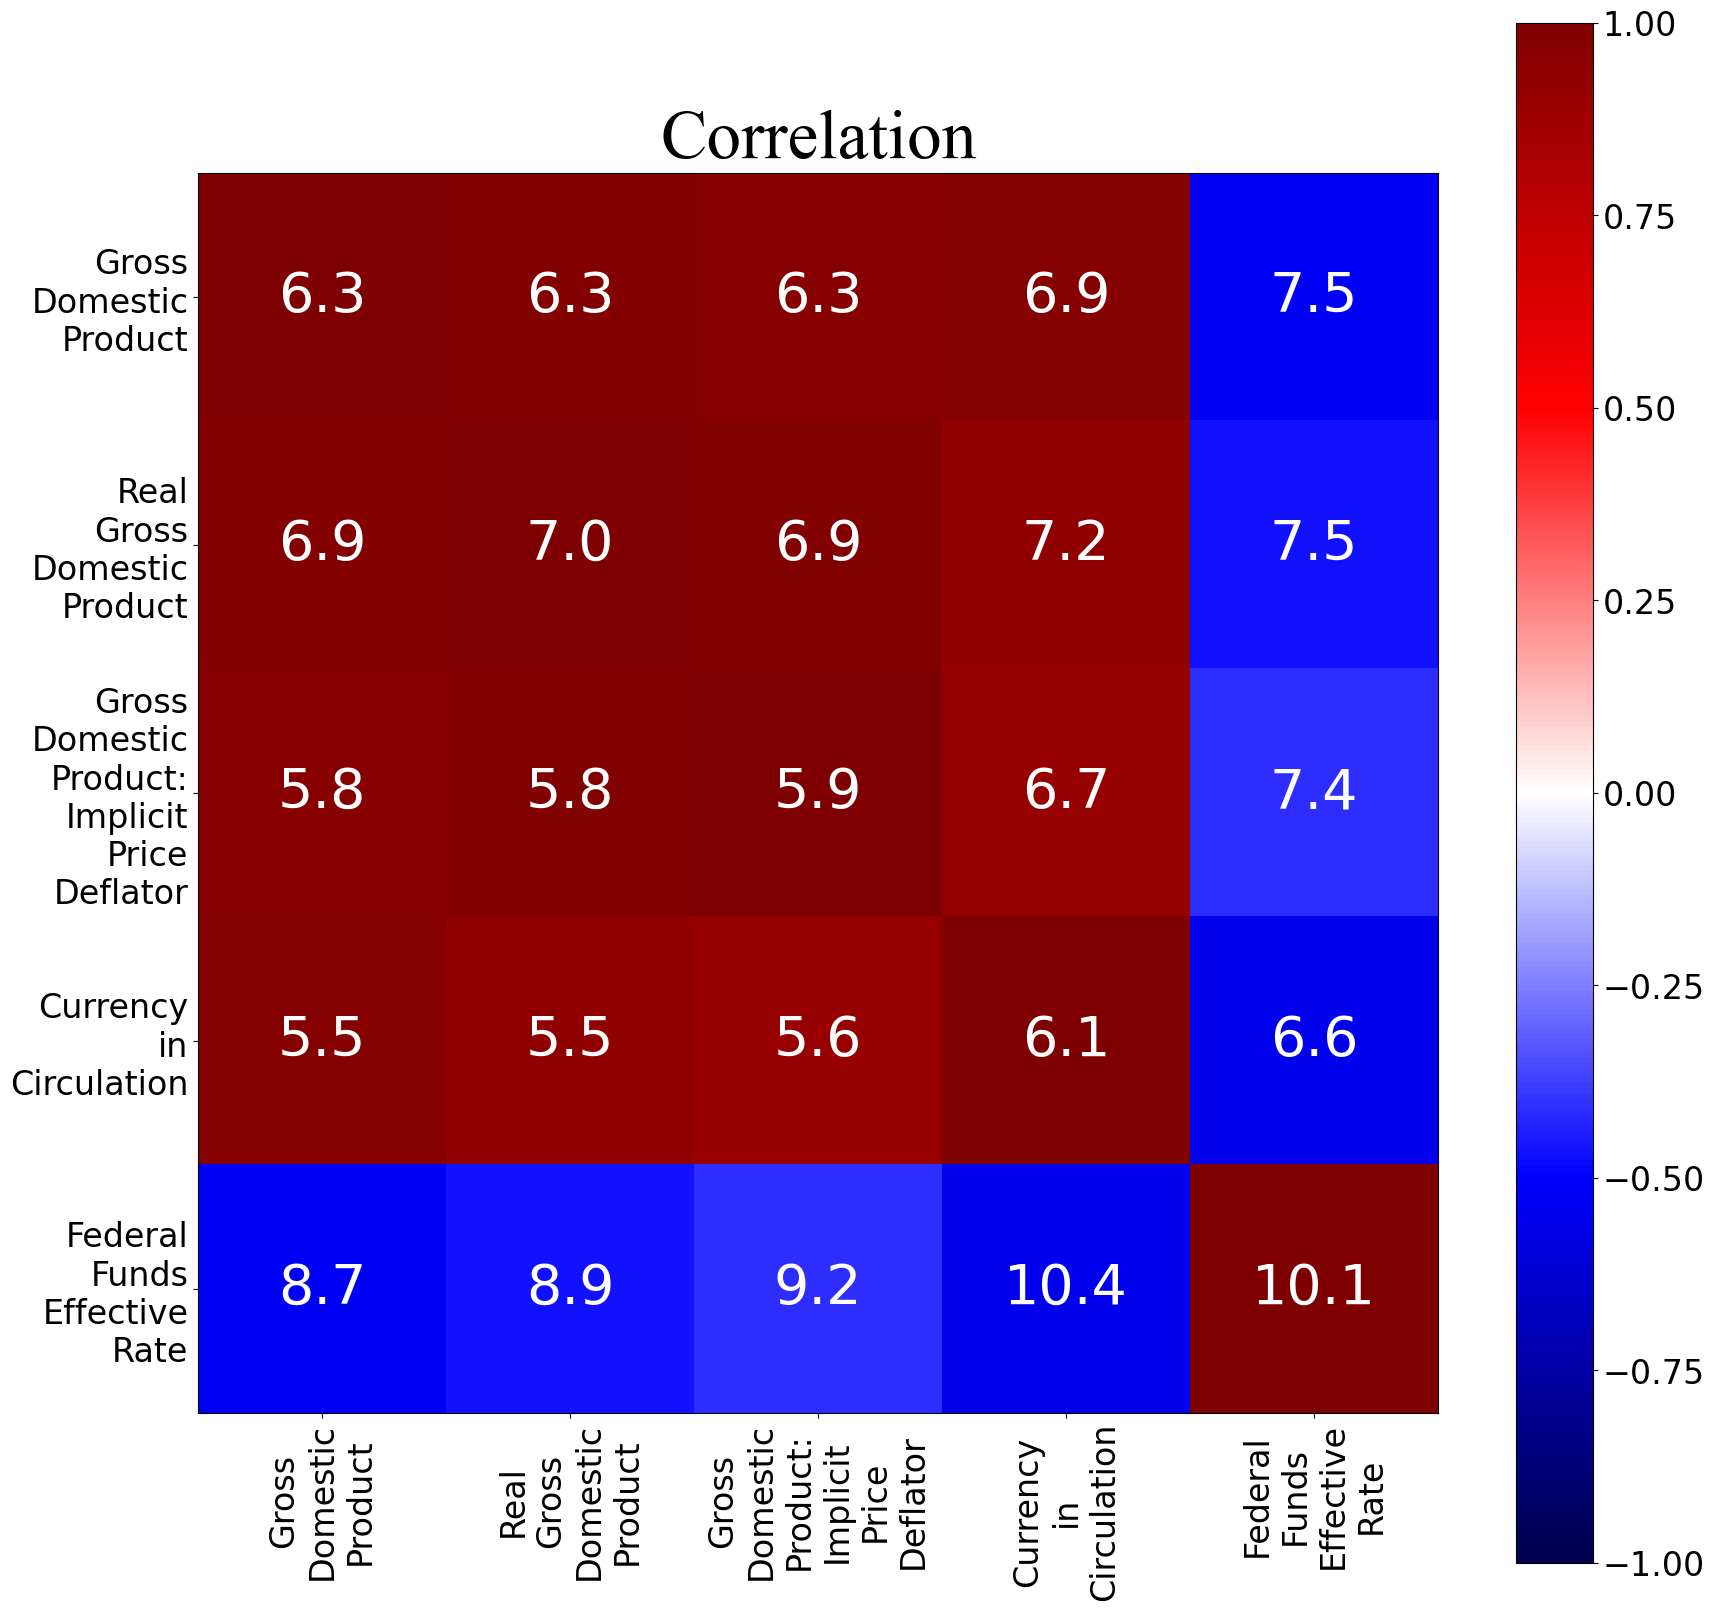

In [71]:
def corr_matrix_heatmap(data1,dim = 20):
    fig, ax = plt.subplots(figsize = (dim,dim))
    im = ax.imshow(data1, norm = plt.cm.colors.Normalize(-1,1), cmap = "seismic")
    labels = data1.keys()
    num_vars = len(labels)
    tick_labels = [label.replace(" ", "\n") for label in labels]
    tick_font_size = 120 / num_vars
    val_font_size = 200 / num_vars
    plt.rcParams.update({'font.size': tick_font_size}) 
    x_ticks = np.arange(num_vars)
    plt.xticks(x_ticks, tick_labels, fontsize = tick_font_size, rotation = 90)
    y_ticks = np.arange(num_vars)
    plt.yticks(y_ticks, tick_labels, fontsize = tick_font_size)
    for i in range (len(labels)):
        for j in range(len(labels)):
            text = ax.text(i,j, str(round(data.values[i][j], 2)),
                          fontsize = val_font_size, ha = "center",
                          va = "center", color = "w")
    title_font = {"fontname":"Times New Roman"}  
    plt.title("Correlation", fontsize = 50, **title_font)  
    cbar = fig.colorbar(im)
    
    
corr_data = data1.corr()    
corr_matrix_heatmap(corr_data)


In [183]:
GDP2 = data1["Gross Domestic Product"].pct_change(periods=4) 
RGDP2 = data1["Real Gross Domestic Product"].pct_change(periods=4)
GDPDEF2 = data1["Gross Domestic Product: Implicit Price Deflator"].pct_change(periods=4)
CURRCIR2 = data1["Currency in Circulation"].pct_change(periods=4)
DFF2 = data1["Federal Funds Effective Rate"].pct_change(periods=4)

In [223]:
df3 = df2.assign(Gross_Domestic_Product_YOY = GDP2,Real_Gross_Domestic_Product_YOY = RGDP2,Gross_Domestic_Product_Implicit_Price_Deflator_YOY = GDPDEF2,
          Currency_in_Circulation_YOY = CURRCIR2, Federal_Funds_Effective_Rate_YOY = DFF2)

In [224]:
df4 = df3[["Gross_Domestic_Product_YOY", "Real_Gross_Domestic_Product_YOY","Gross_Domestic_Product_Implicit_Price_Deflator_YOY",
         "Currency_in_Circulation_YOY", "Federal_Funds_Effective_Rate_YOY"]]

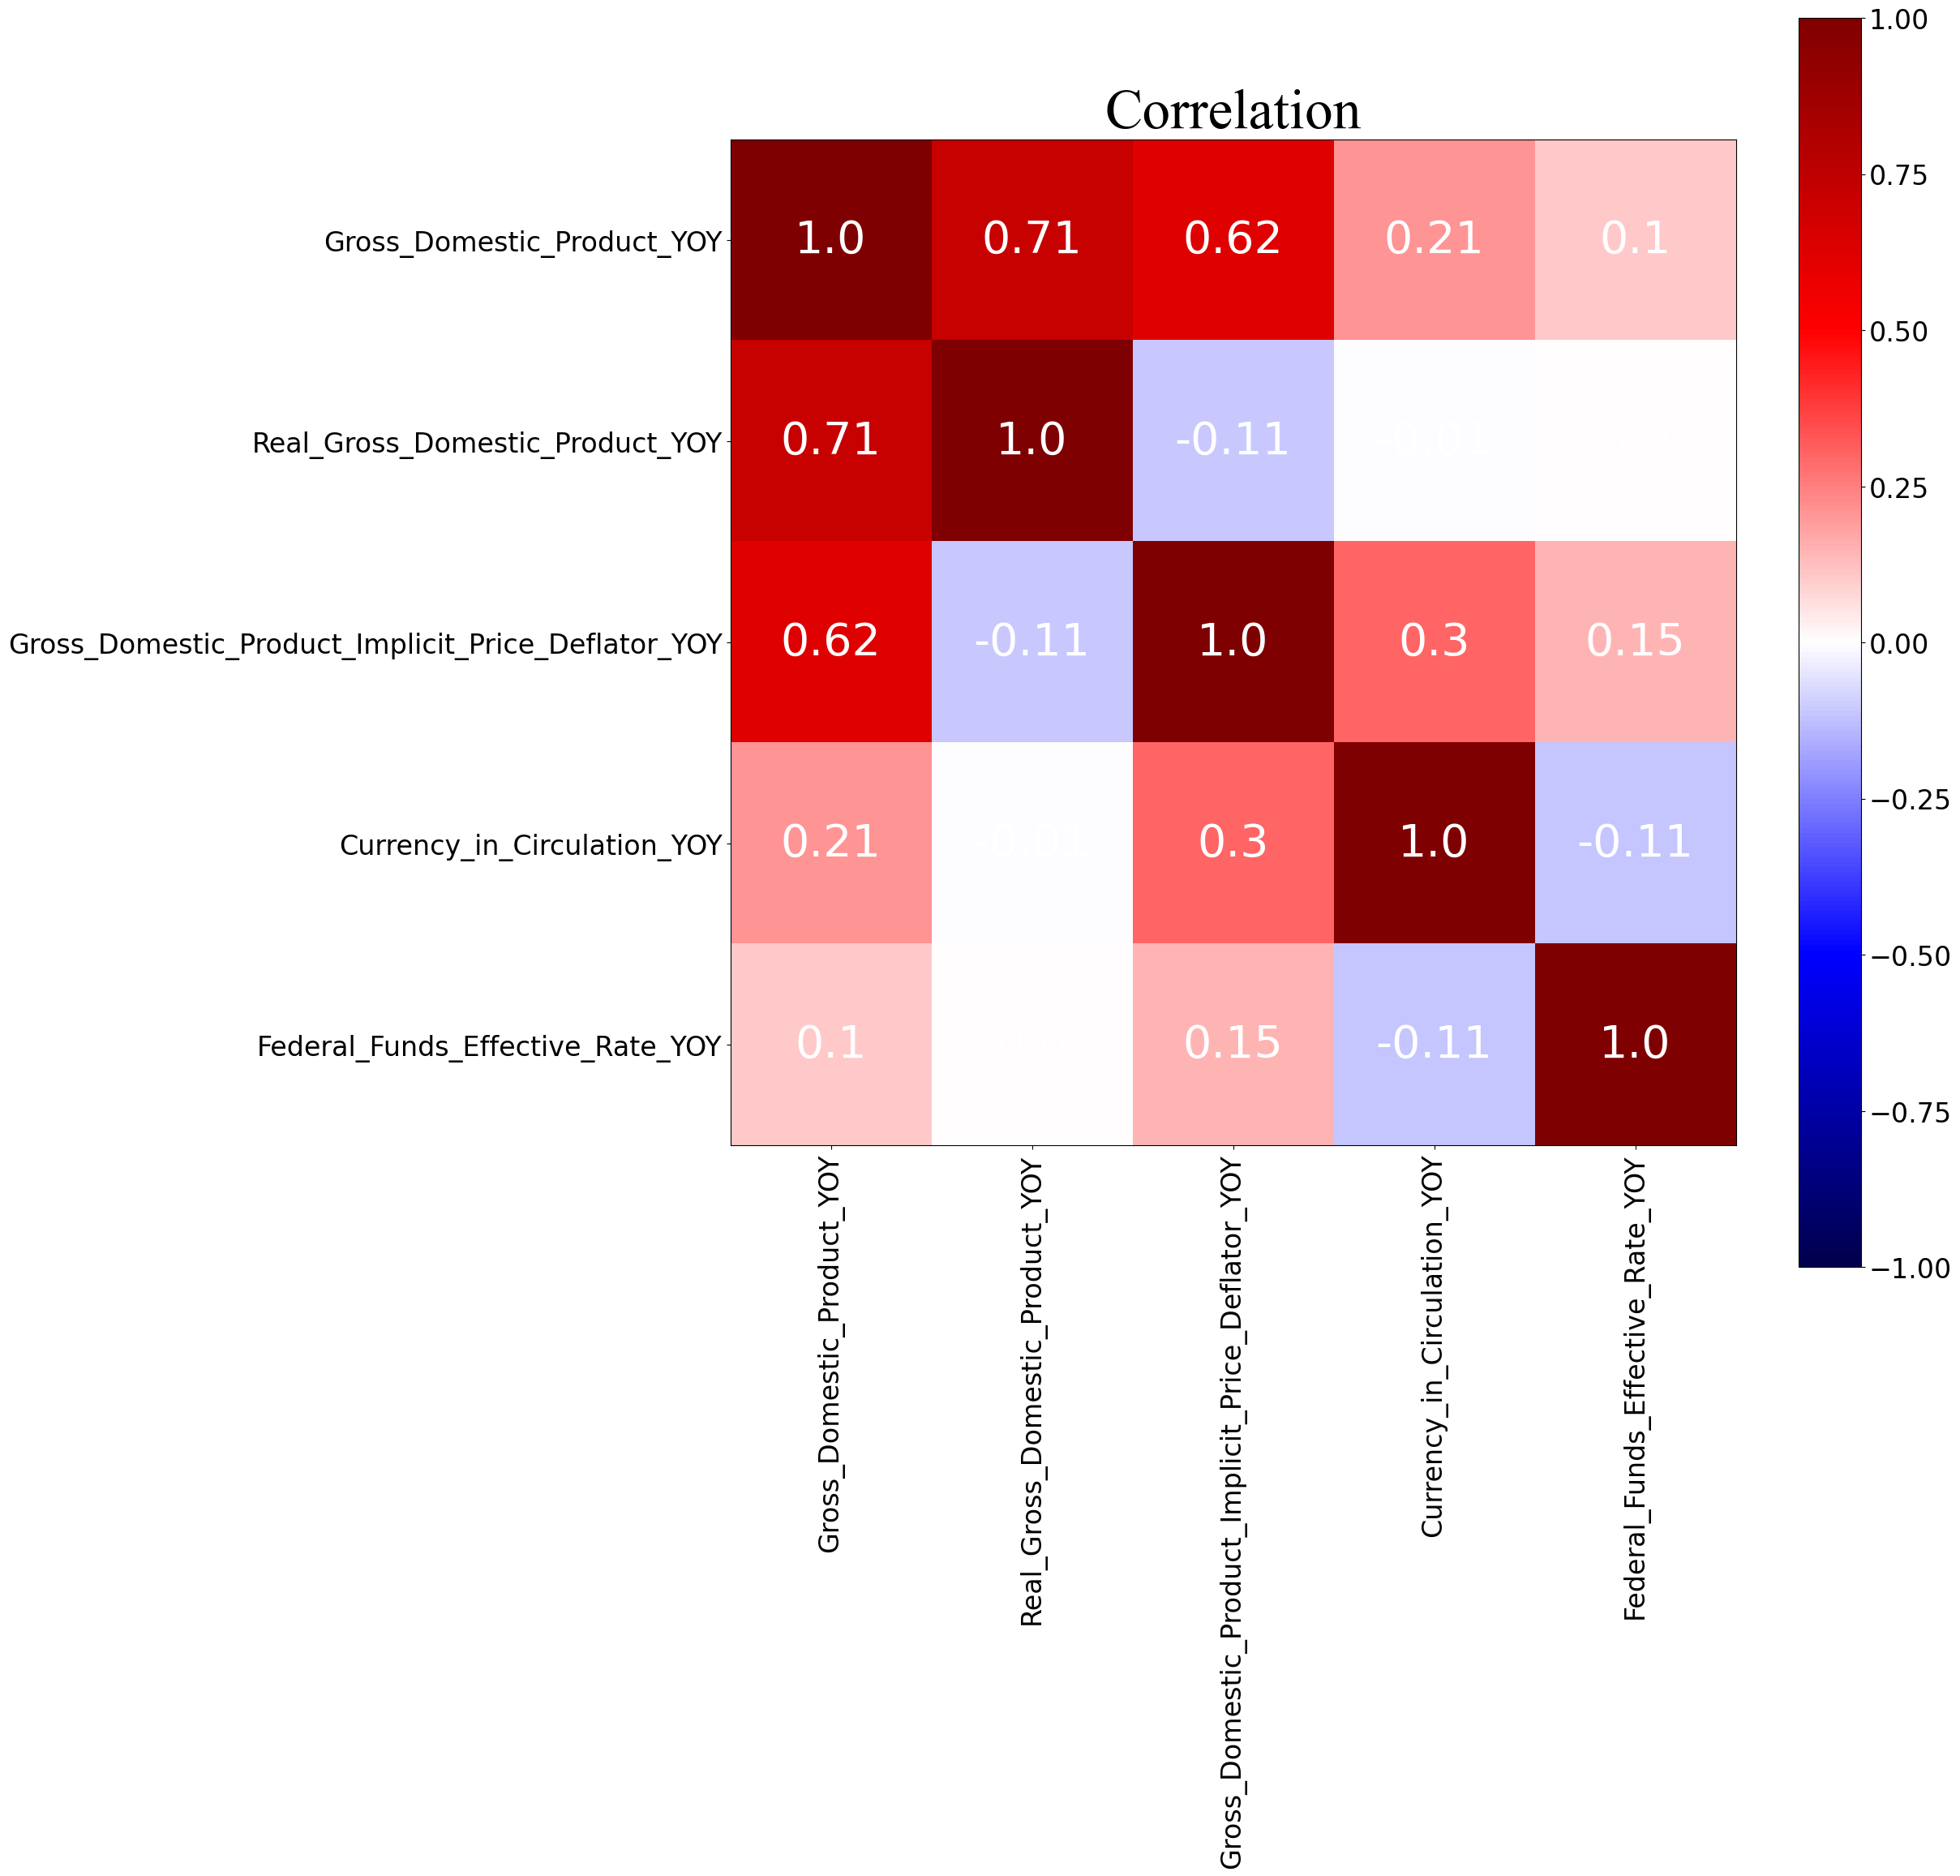

In [234]:
def corr_matrix_heatmap1(df4,dim = 20):
    fig, ax = plt.subplots(figsize = (dim,dim))
    im = ax.imshow(df4, norm = plt.cm.colors.Normalize(-1,1), cmap = "seismic")
    labels = df4.keys()
    num_vars = len(labels)
    tick_labels = [label.replace(" ", "\n") for label in labels]
    tick_font_size = 120 / num_vars
    val_font_size = 200 / num_vars
    plt.rcParams.update({'font.size': tick_font_size}) 
    x_ticks = np.arange(num_vars)
    plt.xticks(x_ticks, tick_labels, fontsize = tick_font_size, rotation = 90)
    y_ticks = np.arange(num_vars)
    plt.yticks(y_ticks, tick_labels, fontsize = tick_font_size)
    for i in range (len(labels)):
        for j in range(len(labels)):
            text = ax.text(i,j, str(round(df3.values[i][j], 2)),
                          fontsize = val_font_size, ha = "center",
                          va = "center", color = "w")
    title_font = {"fontname":"Times New Roman"}  
    plt.title("Correlation", fontsize = 50, **title_font)  
    cbar = fig.colorbar(im)
    
    
corr_data = df4.corr()    
corr_matrix_heatmap(corr_data)


# How has the correlation between each variable changed? Why do you think the correlation changes after calculate the year-over-year percent change?

The correlation has substantially decreased for every variable pairing. All of the numbers are below 1 in the year-over-year correlation plot, whereas all of the numbers are above 5 in the regular correlation plot.
I think that the correlation changes after calculating the year-over-year percent change because the year-over-year data is a percentage. The percentage is based out of 1, whereas the regular correlation is not. It also changes because the year-over-year plot is seeing the changes made in every year.